In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Classification':
  os.chdir(r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Classification')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/yz/9_3w8_1j16g4r8mnf_4c_6pm0000gn/T/ipykernel_17577/226662887.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1694439058.586277, "/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1694439058.588179, "/Users/apolloos/anaconda3/lib/python3.11/zipimport.py": 1694439057.809952, "/Users/apolloos/anaconda3/lib/python3.11/codecs.py": 1694439057.572709, "/Users/apolloos/anaconda3/lib/python3.11/encodings/aliases.py": 1694439058.134947, "/Users/apolloos/anaconda3/lib/python3.11/encodings/__init__.py": 1694439058.132963, "/Users/apolloos/anaconda3/lib/python3.11/encodings/utf_8.py": 1694439058.359777, "/Users/apolloos/anaconda3/lib/python3.11/abc.py": 1694439057.54054, "/Users/apolloos/anaconda3/lib/python3.11/io.py": 1694439057.639787, "/Users/apolloos/anaconda3/lib/python3.11/stat.py": 1694439057.744279, "/Users/apolloos/anaconda3/lib/python3.11/_collections_abc.py": 1694439057.519174, "/Users/apolloos/anaconda3/lib/python3.11/genericpath.py": 1694439057.614934, "/Users/apolloos/anaconda3/lib/python3.11/posi

In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#| echo: false
df_social=pd.read_csv('./Social_Network_Ads.csv')
df_social.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,no
1,35,20000,no
2,26,43000,no
3,27,57000,no
4,19,76000,no


In [4]:
df_social['Purchased']=df_social['Purchased'].apply(lambda x: 0 if x=='no' else 1)
df_social.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


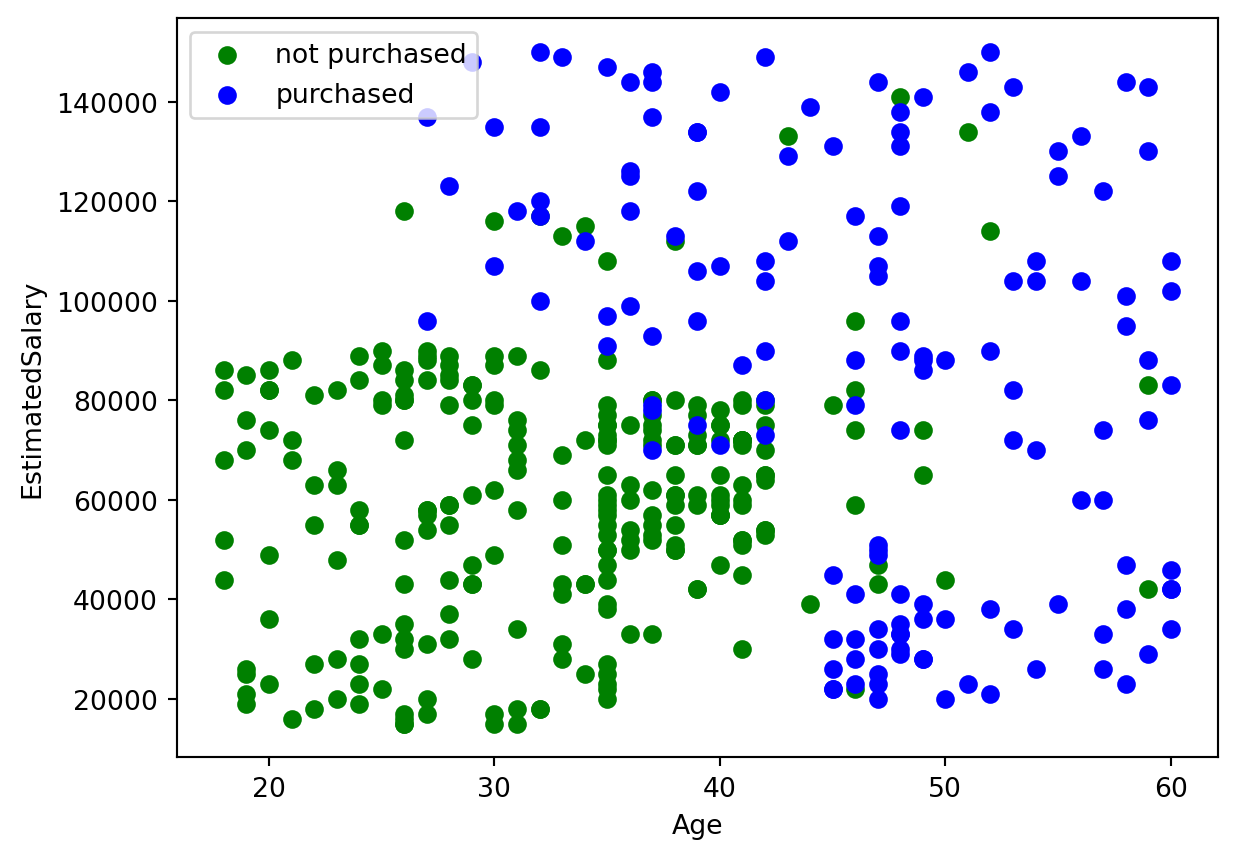

In [5]:
plt.scatter(df_social[df_social['Purchased']==0]['Age'],df_social[df_social['Purchased']==0]['EstimatedSalary'], color='green', label='not purchased')
plt.scatter(df_social[df_social['Purchased']==1]['Age'],df_social[df_social['Purchased']==1]['EstimatedSalary'], color='blue', label='purchased')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [6]:
y=df_social['Purchased'].values
X=df_social.drop(['Purchased'], axis=1).values
y=y.ravel()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=4)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_social=KNeighborsClassifier(n_neighbors=10)
knn_social.fit(X_train,y_train)
knn_social.score(X_test,y_test)

0.8333333333333334

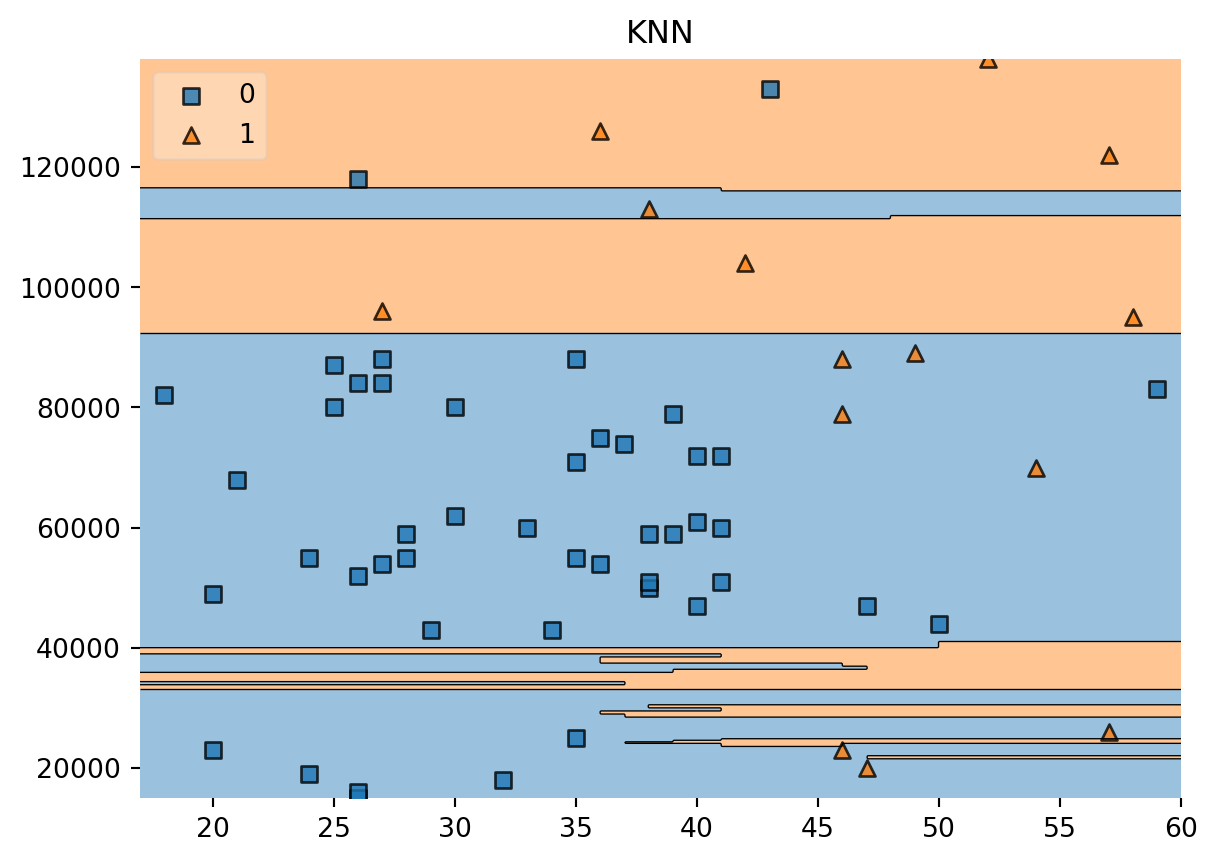

In [9]:
from mlxtend.plotting import plot_decision_regions
fig = plot_decision_regions(X_test, y_test,clf=knn_social, legend=2)
plt.title('KNN')
plt.show()

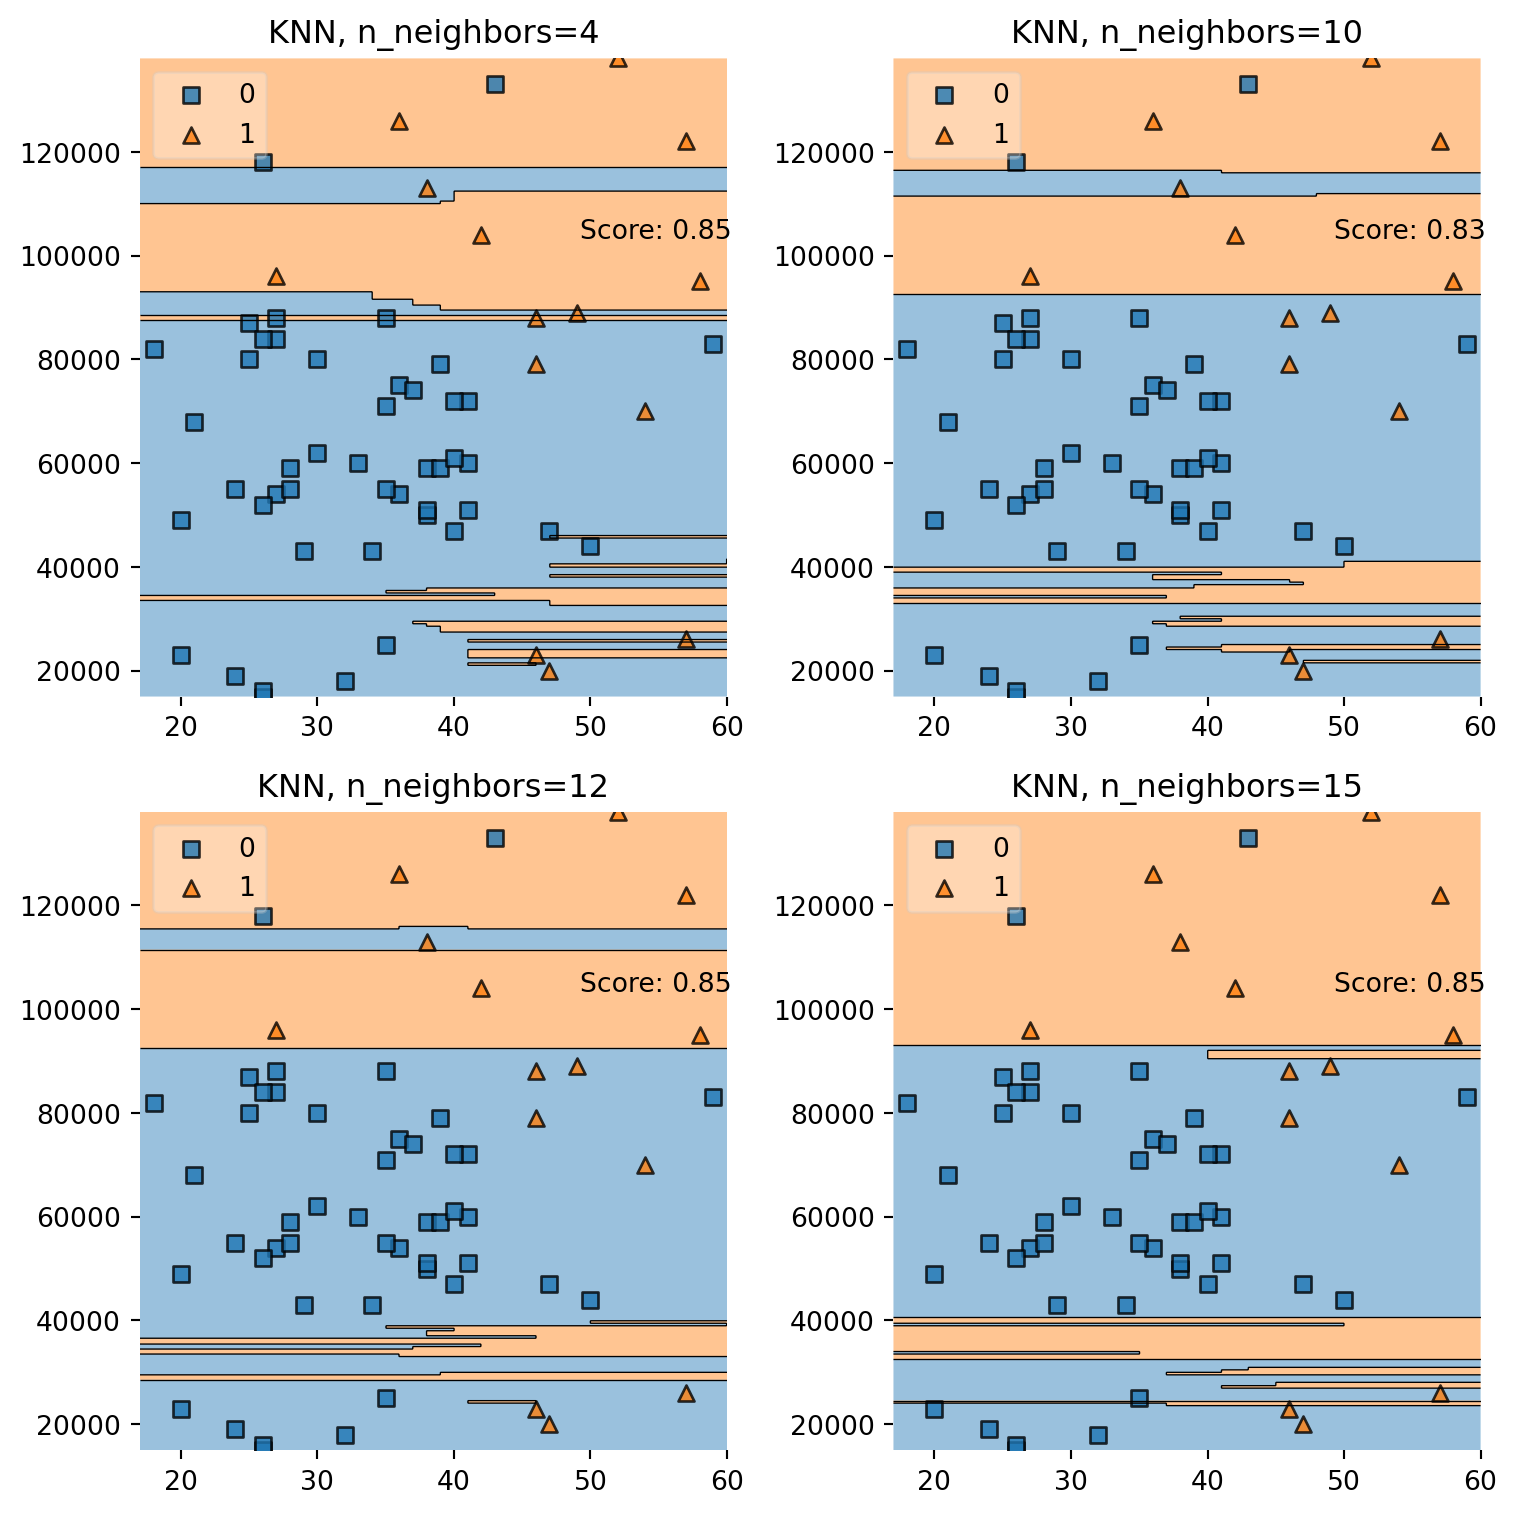

In [10]:
n_neighbors_values = [4, 10, 12, 15]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

# Iterate over values for n_neighbors_values
for i, n_neighbors in enumerate(n_neighbors_values):
    knn_social = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_social.fit(X_train, y_train)
    
    plot_decision_regions(X_test, y_test, clf=knn_social, legend=2, ax=axes[i])
    
    axes[i].set_title(f'KNN, n_neighbors={n_neighbors}')
    
    score = knn_social.score(X_test, y_test)
    axes[i].text(0.75, 0.75, f'Score: {score:.2f}', transform=axes[i].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10, random_state=42),
    SVC(kernel='linear', C=1),
    KNeighborsClassifier(n_neighbors=12)
]

model_names = [
    'Decision Tree',
    'Random Forest',
    'SVC',
    'KNN'
]

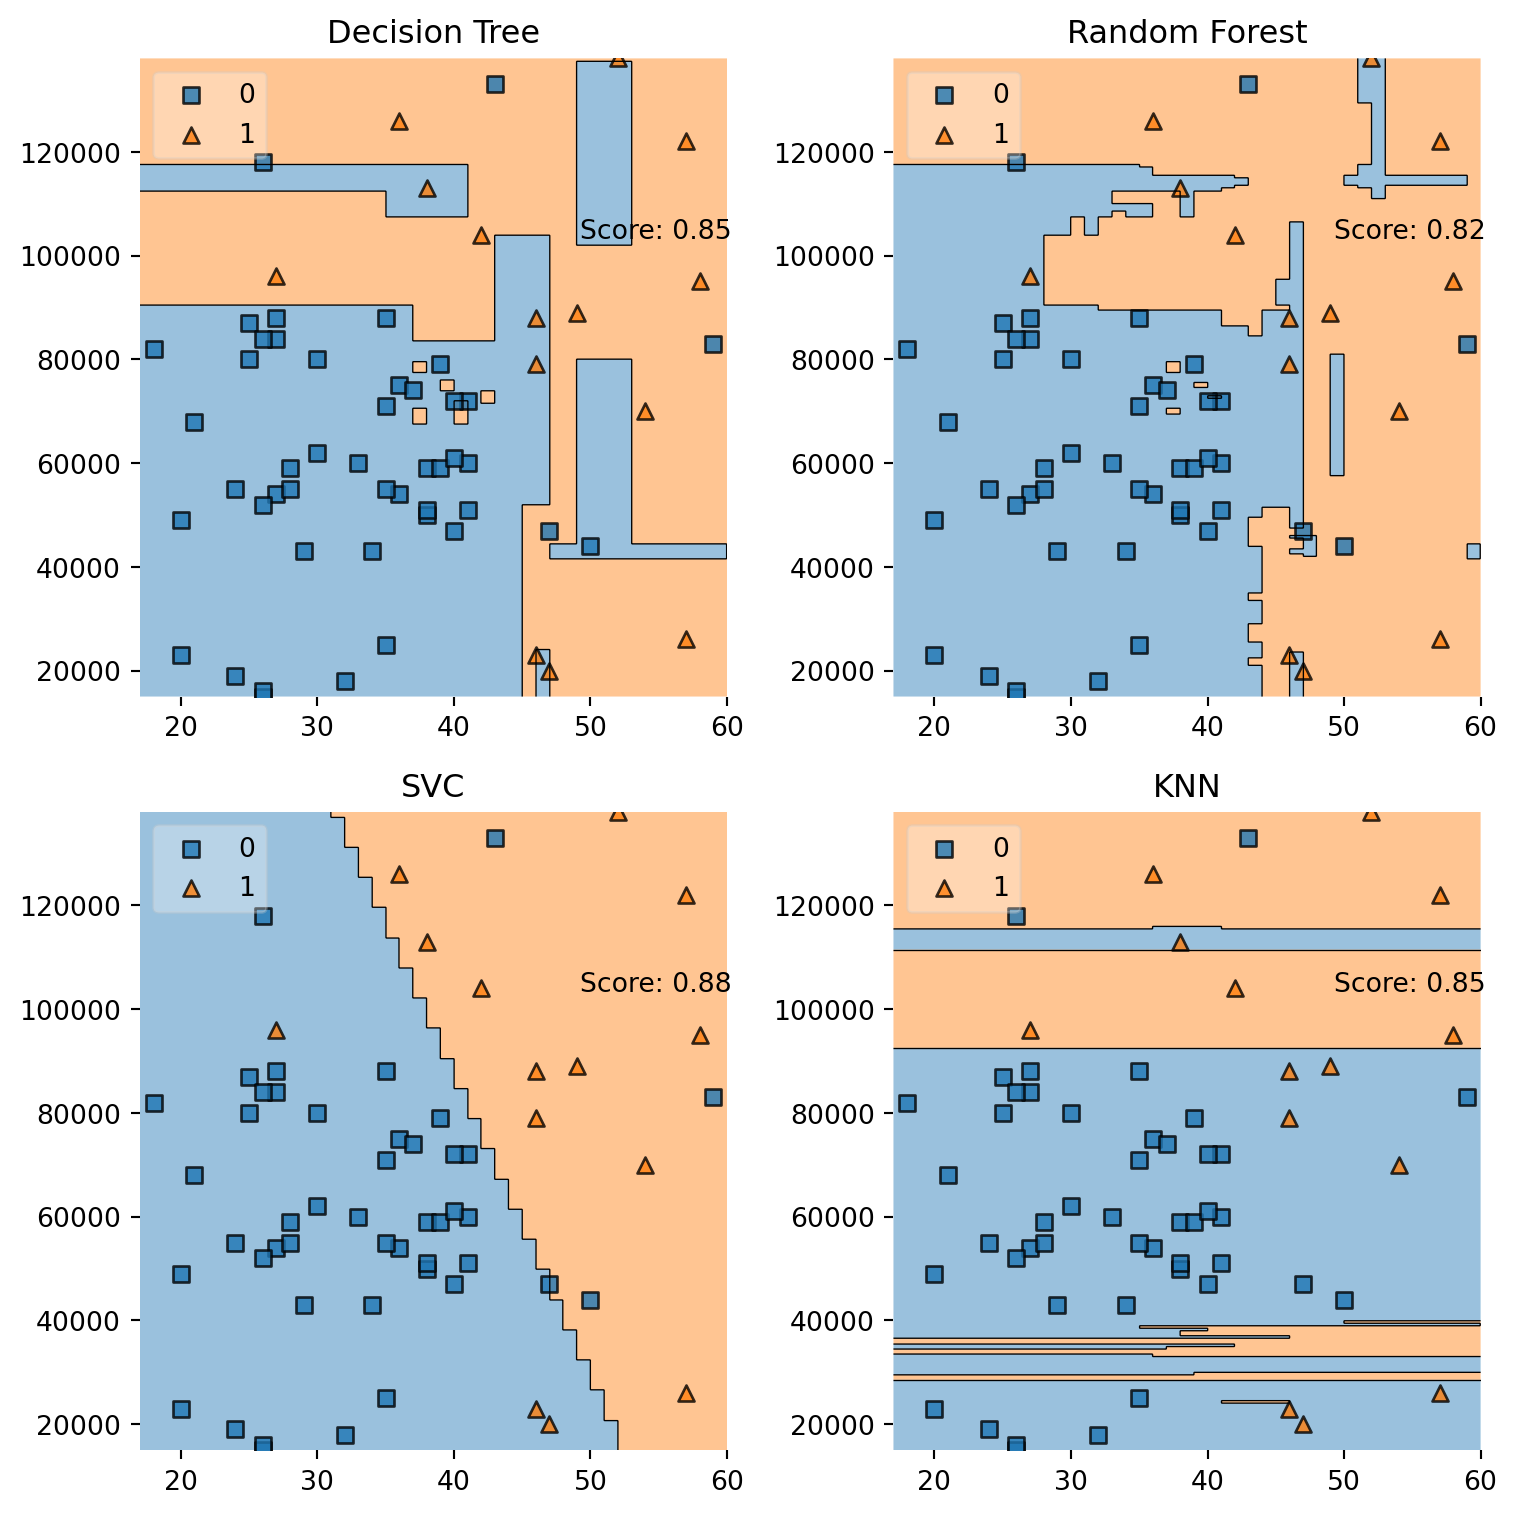

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

# Iterate over models
for i, (model, model_name) in enumerate(zip(models, model_names)):
    model.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, clf=model, legend=2, ax=axes[i])

    
    # Set plot title
    axes[i].set_title(f'{model_name}')
    
    # Display the score inside the plot
    score = model.score(X_test, y_test)
    axes[i].text(0.75, 0.75, f'Score: {score:.2f}', transform=axes[i].transAxes, fontsize=10, verticalalignment='top')


plt.tight_layout()
plt.show()